In [32]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import xgboost as xgb


In [34]:
df = pd.read_csv("car_fuel_efficiency.csv")
print("the dataset shape: ",df.shape)
print("\n")
print("Dataset Info:\n ",df.info())
print("\n")
df.head()

the dataset shape:  (9704, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB
Dataset Info:
  None




,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [35]:
# check for missing values:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [36]:
df = df.fillna(0)
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [37]:
train, test = train_test_split(df,test_size=0.2,random_state=1)
train,val = train_test_split(train,test_size=0.25,random_state=1)

print(f"The percentage of the train data {round(train.shape[0]/len(df) * 100)} %")
print(f"The percentage of the validation data {round(val.shape[0]/len(df) * 100)} %")
print(f"The percentage of the test data {round(test.shape[0]/len(df) * 100)} %")

The percentage of the train data 60 %
The percentage of the validation data 20 %
The percentage of the test data 20 %


In [38]:
X_train = train.drop(columns="fuel_efficiency_mpg")
y_train = train["fuel_efficiency_mpg"].values
X_val = val.drop(columns="fuel_efficiency_mpg")
y_val = val["fuel_efficiency_mpg"].values


In [39]:
# Instanciate the DictVictorizer
dv = DictVectorizer(sparse=True)

# Transform the train data to dictionary
x_train_dict = X_train.to_dict(orient="records")
x_val_dict = X_val.to_dict(orient= "records")

# Transform the val data to dictionary
X_train = dv.fit_transform(x_train_dict)
X_val = dv.fit_transform(x_val_dict)

In [41]:
model = DecisionTreeRegressor(max_depth=1,random_state=1)

model.fit(X_train,y_train)
y_pred = model.predict(X_val)
RMSE = np.sqrt(mean_squared_error(y_val,y_pred))
print(f"RMSE : {RMSE}")

RMSE : 1.6104639028827594


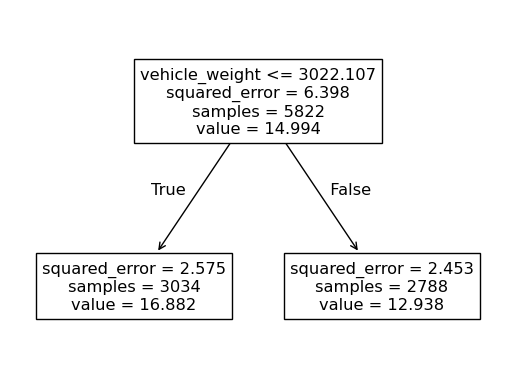

In [42]:
plot_tree(model,feature_names=list(dv.get_feature_names_out()))
plt.show()

In [13]:
tree_features = export_text(model,feature_names=list(dv.get_feature_names_out()))
print(tree_features)

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [14]:
rf = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)
RMSE = np.sqrt(mean_squared_error(y_val,y_pred))
print("The RMSE of the model : ", RMSE)

The RMSE of the model :  0.4595777223092726


In [15]:
scores = []

for n in range(10,201,10):
    rf = RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    RMSE = np.sqrt(mean_squared_error(y_val,y_pred))
    scores.append((n,RMSE))

    

In [16]:
scores_df = pd.DataFrame(scores,columns= ["n_estimator","RMSE"])

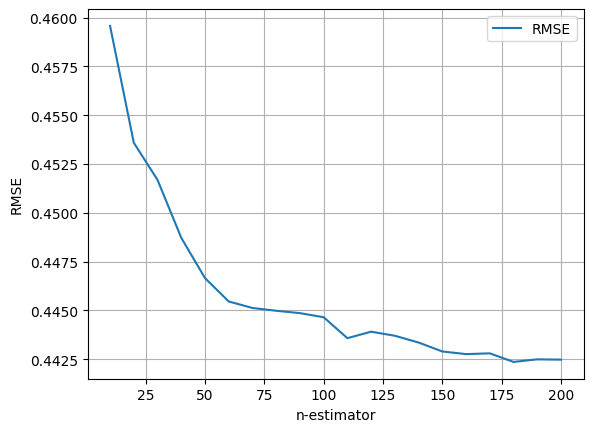

In [17]:
scores_df.plot(x='n_estimator',y='RMSE')
plt.xlabel("n-estimator")
plt.ylabel("RMSE")
plt.grid(True)

In [18]:
scores_df.round(3)

,n_estimator,RMSE
0,10,0.460
1,20,0.454
2,30,0.452
3,40,0.449
4,50,0.447
5,60,0.445
6,70,0.445
7,80,0.445
8,90,0.445
9,100,0.445


In [19]:
scores = []
for d in [10,15,20,25]:
    for n in range(10,201,10):
        rf = RandomForestRegressor(n_estimators=n,max_depth=d,random_state=1,n_jobs=-1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_val)
        RMSE = np.sqrt(mean_squared_error(y_val,y_pred))
        scores.append((d,n,RMSE))
scores_df = pd.DataFrame(scores,columns= ["max_depth","n_estimator","RMSE"])

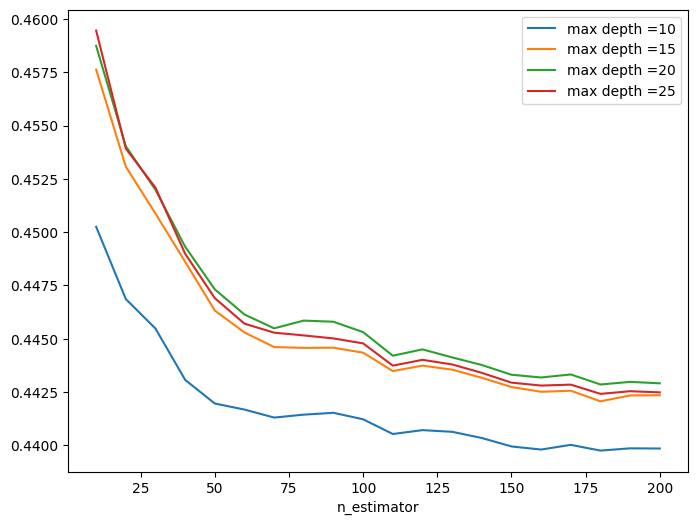

In [20]:
scores_df_10 = scores_df[scores_df["max_depth"]== 10]
scores_df_15 = scores_df[scores_df["max_depth"]== 15]
scores_df_20 = scores_df[scores_df["max_depth"]== 20]
scores_df_25 = scores_df[scores_df["max_depth"]== 25]

# plot the result 
fig,ax = plt.subplots(figsize=(8,6))
scores_df_10.plot(x='n_estimator',y='RMSE',label= "max depth =10",ax=ax)
scores_df_15.plot(x='n_estimator',y='RMSE',label= "max depth =15",ax=ax)
scores_df_20.plot(x='n_estimator',y='RMSE',label= "max depth =20",ax=ax)
scores_df_25.plot(x='n_estimator',y='RMSE',label= "max depth =25",ax=ax)

plt.legend()
plt.show()

In [21]:
scores_df.sort_values(by="RMSE",ascending=True)

,max_depth,n_estimator,RMSE
17,10,180,0.439749
15,10,160,0.439797
19,10,200,0.439845
18,10,190,0.439854
14,10,150,0.439943
...,...,...,...
61,25,20,0.453921
41,20,20,0.454029
20,15,10,0.457624
40,20,10,0.458739


In [22]:
rf_model = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)

In [23]:
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val,y_pred))

rf_model.feature_importances_

array([1.14797006e-02, 3.57108549e-04, 3.45384113e-04, 3.27279191e-03,
       3.25424323e-04, 3.60383601e-04, 1.59978977e-02, 3.21230009e-03,
       2.34334695e-03, 1.63498954e-03, 4.62246496e-04, 5.18739639e-04,
       5.39721689e-04, 9.59149965e-01])

In [24]:
feature_importances = pd.Series(rf_model.feature_importances_, index=list(dv.get_feature_names_out()))
feature_importances.sort_values(ascending=False)


vehicle_weight                  0.959150
horsepower                      0.015998
acceleration                    0.011480
engine_displacement             0.003273
model_year                      0.003212
num_cylinders                   0.002343
num_doors                       0.001635
origin=USA                      0.000540
origin=Europe                   0.000519
origin=Asia                     0.000462
fuel_type=Gasoline              0.000360
drivetrain=All-wheel drive      0.000357
drivetrain=Front-wheel drive    0.000345
fuel_type=Diesel                0.000325
dtype: float64

In [31]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train,label= y_train,feature_names= features)
dval = xgb.DMatrix(X_val,label= y_val,feature_names = features)
for e in [0.1,0.3]:
    xgb_params = {
        'eta': e, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    xgb_model = xgb.train(xgb_params,dtrain,num_boost_round= 100)
    
    
    y_pred = xgb_model.predict(dval)
    rmse = np.sqrt(mean_squared_error(y_val,y_pred))
    print(f"The RMSE with eta {e} is : {rmse}")

The RMSE with eta 0.1 is : 0.42622800553359225
The RMSE with eta 0.3 is : 0.45017755678087246
